# Porto Alegre Apartment Price Prediction

## Summary

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>In this project, we'll build a machine learning predictive model in order to forecast apartment prices in Porto Alegre, Brazil. This project will be implemented from the scratch: scraping data from a real estate website, improving dataset with Geopandas library and then bulding our model based on the features acquired. I hope you enjoy it.</p> 

# Scraping Data

## Importing libraries

In [ ]:
from urllib.request import urlopen, urlretrieve, Request
from bs4 import BeautifulSoup
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time

## Scraping webpage

Obs.: Web scraped on May, 2022. 

In [ ]:
page = '(URL)'
navigator = webdriver.Chrome()
    
navigator.get(page)

time.sleep(5)

list1 = []

list2 = []

list3 = []

list4 = []

list5 = []

list6 = []

for r in range(100): #we will scrape the first 100 pages of the URL
    
    content = navigator.page_source

    site = BeautifulSoup(content, 'html.parser')
    
    cards = site.find('div', {'class': 'results-list js-results-list'})
    
    prices = cards.findAll('div', {'class': 'property-card__price'})
    
    addresses = cards.findAll('span', {'class': 'property-card__address'})
    
    areas = cards.findAll('span', {'class': 'js-property-card-detail-area'})
    
    room = cards.findAll('li', {'class': 'property-card__detail-item property-card__detail-room js-property-detail-rooms'})

    bathroom = cards.findAll('li', 
                        {'class': 'property-card__detail-item property-card__detail-bathroom js-property-detail-bathroom'})
    
    garages = cards.findAll('li', 
                        {'class': 'property-card__detail-item property-card__detail-garage js-property-detail-garages'})
    
    
    for p in prices:
        
        dictio = {}
            
        dictio['price'] = p.get_text().strip()[3:]
            
        list1.append(dictio)
        
        
    for a in addresses:
        
        dictio = {}
            
        dictio['address'] = e.get_text().lower()
            
        list2.append(dictio)
        
        
    for s in areas:
        
        dictio = {}
            
        dictio['area'] = m.get_text().strip()
            
        list3.append(dictio)
    
    
    for r in room:
        
        dictio = {}
            
        dictio['rooms'] = q.get_text().strip()[:1]
            
        list4.append(dictio)
        
        
    for b in bathroom:
        
        dictio = {}
            
        dictio['bathrooms'] = b.get_text().strip()[:1]
            
        list5.append(dictio)
        
    
    for g in garages:
        
        dictio = {}
        
        try:
            
            dictio['garage'] = g.get_text().strip()[:1]
        
        except AttributeError:
            
            dictio['garage'] = '0'
            
        list6.append(dictio)
    
        
    navigator.find_element(By.XPATH,
                           '//*[@id="js-site-main"]/div[2]/div[1]/section/div[2]/div[2]/div/ul/li[9]/a').send_keys(Keys.ENTER)
        
    time.sleep(20)

dataset = pd.DataFrame(list1)
dataset['address'] = pd.DataFrame(list2)
dataset['area'] = pd.DataFrame(list3)
dataset['rooms'] = pd.DataFrame(list4)
dataset['bathrooms'] = pd.DataFrame(list5)
dataset['garage'] = pd.DataFrame(list6)
dataset

,price,address,area,rooms,bathrooms,garage
0,519.900,"rua são luís, 1163 - santana, porto alegre - rs",58,2,2,1
1,artir de R$ 773.390,"rua miguel tostes, 962 - rio branco, porto ale...",43-72,1,1,1
2,270.000,"rua marechal floriano peixoto, 390 - centro hi...",68,2,3,-
3,455.000,"rua garibaldi, 1033 - bom fim, porto alegre - rs",59,2,1,1
4,624.000,"rua general neto - moinhos de vento, porto ale...",113,3,3,2
...,...,...,...,...,...,...
7195,150.000,"santa tereza, porto alegre - rs",39,1,1,1
7196,480.000\n \nPreço abaixo ...,"jardim do salso, porto alegre - rs",62,2,2,2
7197,870.000\n \nPreço abaixo ...,"rua mostardeiro, 919 - moinhos de vento, porto...",87,2,1,2
7198,740.000,"rua coronel feijó, 516 - higienópolis, porto a...",80,2,2,1


In [ ]:
dataset.to_excel('dataset.xlsx', index = False)

# Improving the dataset with Geopandas

## Importing libraries

In [ ]:
%matplotlib inline
import geopandas as gpd
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from selenium import webdriver
from selenium.webdriver.common.keys import Keys 
from selenium.webdriver.common.by import By 
import time
from selenium.webdriver import ActionChains
import pyautogui
import pyperclip
from shapely.geometry import Point

## Reading the Geodataframe of Porto Alegre neighborhoods

Source: http://datapoa.com.br/dataset/bairros-lc-12-112-16

In [ ]:
poa_neighborhoods = gpd.read_file('bairros/Bairros_2016.shp')
poa_neighborhoods.head()

,OBJECTID,CODIGO,EDITOR,DATA_EDICA,NOME,geometry
0,0,0,None,1899-12-30,LAMI,"POLYGON ((291163.025 1656544.013, 291173.664 1..."
1,0,0,None,1899-12-30,BOA VISTA DO SUL,"MULTIPOLYGON (((284220.343 1650812.330, 284221..."
2,0,0,None,1899-12-30,EXTREMA,"POLYGON ((294981.188 1654438.415, 294972.136 1..."
3,0,0,None,1899-12-30,BELÉM NOVO,"POLYGON ((284657.457 1658914.972, 284650.143 1..."
4,0,0,None,1899-12-30,SÃO CAETANO,"POLYGON ((294834.673 1658905.795, 294754.377 1..."


In [ ]:
poa_neighborhoods.crs

<Derived Projected CRS: PROJCS["TM-POA",GEOGCS["SIRGAS 2000",DATUM["Sistem ...>
Name: TM-POA
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

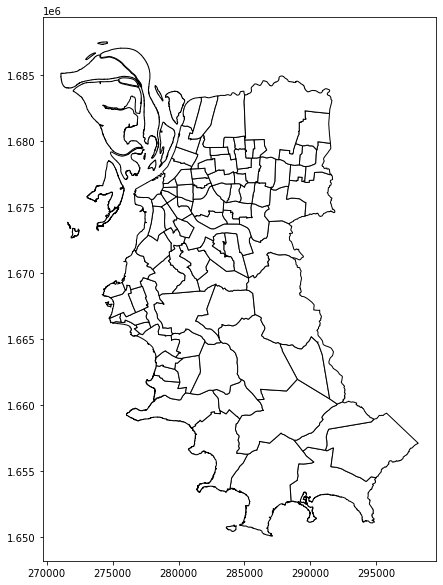

In [ ]:
poa_neighborhoods.plot(color='white', edgecolor='black', figsize=(20,10))

## Reading the dataset previously scraped

Obs.: The dataset was pretreated externally

In [ ]:
dataframe = pd.read_excel('dataset.xlsx')
pd.set_option('display.max_colwidth', None)
dataframe.head()

,price,address,neighborhood,area,rooms,bathrooms,garage
0,519900,"rua são luís, 1163 - santana, porto alegre - rs",santana,58,2,2,1
1,773390,"rua miguel tostes, 962 - rio branco, porto alegre - rs",rio branco,43,1,1,1
2,270000,"rua marechal floriano peixoto, 390 - centro histórico, porto alegre - rs",centro histórico,68,2,3,0
3,455000,"rua garibaldi, 1033 - bom fim, porto alegre - rs",bom fim,59,2,1,1
4,624000,"rua general neto - moinhos de vento, porto alegre - rs",moinhos de vento,113,3,3,2


In [ ]:
dataframe.shape

(6970, 7)

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>In order to get the geo location of each of the addresses above, we will use Nominatim from Geopy library:</p> 

## Obtaining Latitude and Longitude

In [ ]:
locator = Nominatim(user_agent = 'myGeocoder')

In [ ]:
geocode = RateLimiter(locator.geocode, min_delay_seconds = 1)

In [ ]:
dataframe['geo_address'] = dataframe['address'].apply(geocode)

In [ ]:
dataframe.head()

,price,address,neighborhood,area,rooms,bathrooms,garage,geo_address
0,519900,"rua são luís, 1163 - santana, porto alegre - rs",santana,58,2,2,1,"(Rua São Luiz, Santana, Porto Alegre, Região Geográfica Imediata de Porto Alegre, Região Metropolitana de Porto Alegre, Região Geográfica Intermediária de Porto Alegre, Rio Grande do Sul, Região Sul, 91160-093, Brasil, (-30.0445173, -51.2066149))"
1,773390,"rua miguel tostes, 962 - rio branco, porto alegre - rs",rio branco,43,1,1,1,"(Rua Miguel Tostes, Rio Branco, Porto Alegre, Região Geográfica Imediata de Porto Alegre, Região Metropolitana de Porto Alegre, Região Geográfica Intermediária de Porto Alegre, Rio Grande do Sul, Região Sul, 90420-090, Brasil, (-30.0335033, -51.2056846))"
2,270000,"rua marechal floriano peixoto, 390 - centro histórico, porto alegre - rs",centro histórico,68,2,3,0,"(Rua Marechal Floriano Peixoto, Centro Histórico, Porto Alegre, Região Geográfica Imediata de Porto Alegre, Região Metropolitana de Porto Alegre, Região Geográfica Intermediária de Porto Alegre, Rio Grande do Sul, Região Sul, 90020-061, Brasil, (-30.0308863, -51.2269055))"
3,455000,"rua garibaldi, 1033 - bom fim, porto alegre - rs",bom fim,59,2,1,1,"(Rua Garibaldi, Bom Fim, Porto Alegre, Região Geográfica Imediata de Porto Alegre, Região Metropolitana de Porto Alegre, Região Geográfica Intermediária de Porto Alegre, Rio Grande do Sul, Região Sul, 90035-052, Brasil, (-30.031325, -51.2152113))"
4,624000,"rua general neto - moinhos de vento, porto alegre - rs",moinhos de vento,113,3,3,2,"(Rua General Neto, Moinhos de Vento, Porto Alegre, Região Geográfica Imediata de Porto Alegre, Região Metropolitana de Porto Alegre, Região Geográfica Intermediária de Porto Alegre, Rio Grande do Sul, Região Sul, 90035-001, Brasil, (-30.0247719, -51.2099252))"


In [ ]:
dataframe['latitude'] = dataframe['geo_address'].apply(lambda loc: loc.latitude if loc else None)
dataframe['longitude'] = dataframe['geo_address'].apply(lambda loc: loc.longitude if loc else None)

In [ ]:
dataframe.head()

,price,address,neighborhood,area,rooms,bathrooms,garage,geo_address,latitude,longitude
0,519900,"rua são luís, 1163 - santana, porto alegre - rs",santana,58,2,2,1,"(Rua São Luiz, Santana, Porto Alegre, Região Geográfica Imediata de Porto Alegre, Região Metropolitana de Porto Alegre, Região Geográfica Intermediária de Porto Alegre, Rio Grande do Sul, Região Sul, 91160-093, Brasil, (-30.0445173, -51.2066149))",-30.044517,-51.206615
1,773390,"rua miguel tostes, 962 - rio branco, porto alegre - rs",rio branco,43,1,1,1,"(Rua Miguel Tostes, Rio Branco, Porto Alegre, Região Geográfica Imediata de Porto Alegre, Região Metropolitana de Porto Alegre, Região Geográfica Intermediária de Porto Alegre, Rio Grande do Sul, Região Sul, 90420-090, Brasil, (-30.0335033, -51.2056846))",-30.033503,-51.205685
2,270000,"rua marechal floriano peixoto, 390 - centro histórico, porto alegre - rs",centro histórico,68,2,3,0,"(Rua Marechal Floriano Peixoto, Centro Histórico, Porto Alegre, Região Geográfica Imediata de Porto Alegre, Região Metropolitana de Porto Alegre, Região Geográfica Intermediária de Porto Alegre, Rio Grande do Sul, Região Sul, 90020-061, Brasil, (-30.0308863, -51.2269055))",-30.030886,-51.226906
3,455000,"rua garibaldi, 1033 - bom fim, porto alegre - rs",bom fim,59,2,1,1,"(Rua Garibaldi, Bom Fim, Porto Alegre, Região Geográfica Imediata de Porto Alegre, Região Metropolitana de Porto Alegre, Região Geográfica Intermediária de Porto Alegre, Rio Grande do Sul, Região Sul, 90035-052, Brasil, (-30.031325, -51.2152113))",-30.031325,-51.215211
4,624000,"rua general neto - moinhos de vento, porto alegre - rs",moinhos de vento,113,3,3,2,"(Rua General Neto, Moinhos de Vento, Porto Alegre, Região Geográfica Imediata de Porto Alegre, Região Metropolitana de Porto Alegre, Região Geográfica Intermediária de Porto Alegre, Rio Grande do Sul, Região Sul, 90035-001, Brasil, (-30.0247719, -51.2099252))",-30.024772,-51.209925


In [ ]:
dataframe.geo_address.isna().sum()

446

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Since we have some missing values, let's try to get them from other sources, like Google Maps. For this, we are going to use both Selenium and Pyautogui libraries:</p> 

In [ ]:
dataframe_no_geo = dataframe.loc[dataframe.geo_address.isna()]
dataframe_no_geo.head()

,price,address,neighborhood,area,rooms,bathrooms,garage,geo_address,latitude,longitude
19,780000,"rua jayr amaury koebe, 44 - central parque, porto alegre - rs",central parque,70,2,2,2,None,NaN,NaN
22,500000,"rua frederico otávio domingues barbosa, 50 - jardim lindóia, porto alegre - rs",jardim lindóia,66,2,2,1,None,NaN,NaN
26,1999000,"rua amélia teles - petrópolis, porto alegre - rs",petrópolis,245,3,5,3,None,NaN,NaN
41,160000,"rua doutor galeno pianta, 90 - glória, porto alegre - rs",glória,40,1,1,1,None,NaN,NaN
43,450000,"rua eurico lara - menino deus, porto alegre - rs",menino deus,86,3,2,2,None,NaN,NaN


In [ ]:
index_dataframe = dataframe_no_geo.index

In [ ]:
list_points =[]
for i in dataframe_no_geo['address']:
    navigator = webdriver.Chrome()
    navigator.get('https://www.google.com.br/maps')
    time.sleep(3)
    navigator.find_element(By.XPATH, '//*[@id="searchboxinput"]').send_keys(i)
    time.sleep(1)
    navigator.find_element(By.XPATH, '//*[@id="searchbox-searchbutton"]').click()
    time.sleep(1)
    pyautogui.click(button='right')
    time.sleep(2)
    point = navigator.find_element(By.XPATH, '//*[@id="action-menu"]/ul/li[1]/div[3]/div[1]').text
    list_points.append(point)
    time.sleep(2)

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Let's convert the list of points to a dataframe containing the latitude and longitude of each point:</p> 

In [ ]:
list_points_split = []
for i in list_points:
    i = i.split(',')
    list_points_split.append(i)
list_points_latitude = []
list_points_longitude = []
for l in list_points_split:
    list_points_latitude.append(l[0])
    list_points_longitude.append(l[1].strip())
    
    
geo_points_latitude = pd.DataFrame(list_points_latitude)
geo_points_latitude.rename(columns = {0: 'latitude'}, inplace = True)


geo_points_longitude = pd.DataFrame(list_points_longitude)
geo_points_longitude.rename(columns = {0: 'longitude'}, inplace = True)


geo_points = pd.concat([geo_points_latitude, geo_points_longitude], axis = 1)

In [ ]:
geo_points.head()

,latitude,longitude
0,-30.05188,-51.16596
1,-30.00700,-51.14077
2,-30.03937,-51.18995
3,-30.07218,-51.19824
4,-30.06050,-51.21568


<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>At this point, we can include these elements  to our dataframe_no_geo:</p> 

In [ ]:
geo_points.index = index_dataframe

dataframe_no_geo = dataframe_no_geo.drop(columns = ['latitude', 'longitude'], axis = 1)

dataframe_no_geo = pd.concat([dataframe_no_geo, geo_points], axis = 1)
dataframe_no_geo.head()

,price,address,neighborhood,area,rooms,bathrooms,garage,geo_address,latitude,longitude
19,780000,"rua jayr amaury koebe, 44 - central parque, porto alegre - rs",central parque,70,2,2,2,None,-30.05188,-51.16596
22,500000,"rua frederico otávio domingues barbosa, 50 - jardim lindóia, porto alegre - rs",jardim lindóia,66,2,2,1,None,-30.00700,-51.14077
26,1999000,"rua amélia teles - petrópolis, porto alegre - rs",petrópolis,245,3,5,3,None,-30.03937,-51.18995
41,160000,"rua doutor galeno pianta, 90 - glória, porto alegre - rs",glória,40,1,1,1,None,-30.07218,-51.19824
43,450000,"rua eurico lara - menino deus, porto alegre - rs",menino deus,86,3,2,2,None,-30.06050,-51.21568


<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>We need to convert latitude and longitude to float values.</p> 

In [ ]:
dataframe_no_geo['latitude'] = dataframe_no_geo['latitude'].astype('float')
dataframe_no_geo['longitude'] = dataframe_no_geo['longitude'].astype('float')

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Right now, we are able to bring these data back to our main dataframe:</p> 

In [ ]:
index_dataframe = dataframe_no_geo.index

dataframe.drop(index_dataframe, axis = 0, inplace = True)

In [ ]:
dataframe_final = pd.concat([dataframe, dataframe_no_geo], axis = 0)
dataframe_final.reset_index(inplace = True)
dataframe_final.head()

,index,price,address,neighborhood,area,rooms,bathrooms,garage,geo_address,latitude,longitude
0,0,519900,"rua são luís, 1163 - santana, porto alegre - rs",santana,58,2,2,1,"(Rua São Luiz, Santana, Porto Alegre, Região Geográfica Imediata de Porto Alegre, Região Metropolitana de Porto Alegre, Região Geográfica Intermediária de Porto Alegre, Rio Grande do Sul, Região Sul, 91160-093, Brasil, (-30.0445173, -51.2066149))",-30.044517,-51.206615
1,1,773390,"rua miguel tostes, 962 - rio branco, porto alegre - rs",rio branco,43,1,1,1,"(Rua Miguel Tostes, Rio Branco, Porto Alegre, Região Geográfica Imediata de Porto Alegre, Região Metropolitana de Porto Alegre, Região Geográfica Intermediária de Porto Alegre, Rio Grande do Sul, Região Sul, 90420-090, Brasil, (-30.0335033, -51.2056846))",-30.033503,-51.205685
2,2,270000,"rua marechal floriano peixoto, 390 - centro histórico, porto alegre - rs",centro histórico,68,2,3,0,"(Rua Marechal Floriano Peixoto, Centro Histórico, Porto Alegre, Região Geográfica Imediata de Porto Alegre, Região Metropolitana de Porto Alegre, Região Geográfica Intermediária de Porto Alegre, Rio Grande do Sul, Região Sul, 90020-061, Brasil, (-30.0308863, -51.2269055))",-30.030886,-51.226906
3,3,455000,"rua garibaldi, 1033 - bom fim, porto alegre - rs",bom fim,59,2,1,1,"(Rua Garibaldi, Bom Fim, Porto Alegre, Região Geográfica Imediata de Porto Alegre, Região Metropolitana de Porto Alegre, Região Geográfica Intermediária de Porto Alegre, Rio Grande do Sul, Região Sul, 90035-052, Brasil, (-30.031325, -51.2152113))",-30.031325,-51.215211
4,4,624000,"rua general neto - moinhos de vento, porto alegre - rs",moinhos de vento,113,3,3,2,"(Rua General Neto, Moinhos de Vento, Porto Alegre, Região Geográfica Imediata de Porto Alegre, Região Metropolitana de Porto Alegre, Região Geográfica Intermediária de Porto Alegre, Rio Grande do Sul, Região Sul, 90035-001, Brasil, (-30.0247719, -51.2099252))",-30.024772,-51.209925


## Converting the Dataframe to Geodataframe

In [ ]:
geometry = [Point(x) for x in zip(dataframe_final.longitude, dataframe_final.latitude)]

In [ ]:
crs = {'proj': 'latlong', 'ellps': 'WGS84', 'datum': 'WGS84', 'no_defs': True}
geo_dataframe = gpd.GeoDataFrame(dataframe_final, crs = crs, geometry = geometry)

In [ ]:
geo_dataframe.head()

,index,price,address,neighborhood,area,rooms,bathrooms,garage,geo_address,latitude,longitude,geometry
0,0,519900,"rua são luís, 1163 - santana, porto alegre - rs",santana,58,2,2,1,"(Rua São Luiz, Santana, Porto Alegre, Região Geográfica Imediata de Porto Alegre, Região Metropolitana de Porto Alegre, Região Geográfica Intermediária de Porto Alegre, Rio Grande do Sul, Região Sul, 91160-093, Brasil, (-30.0445173, -51.2066149))",-30.044517,-51.206615,POINT (-51.20661 -30.04452)
1,1,773390,"rua miguel tostes, 962 - rio branco, porto alegre - rs",rio branco,43,1,1,1,"(Rua Miguel Tostes, Rio Branco, Porto Alegre, Região Geográfica Imediata de Porto Alegre, Região Metropolitana de Porto Alegre, Região Geográfica Intermediária de Porto Alegre, Rio Grande do Sul, Região Sul, 90420-090, Brasil, (-30.0335033, -51.2056846))",-30.033503,-51.205685,POINT (-51.20568 -30.03350)
2,2,270000,"rua marechal floriano peixoto, 390 - centro histórico, porto alegre - rs",centro histórico,68,2,3,0,"(Rua Marechal Floriano Peixoto, Centro Histórico, Porto Alegre, Região Geográfica Imediata de Porto Alegre, Região Metropolitana de Porto Alegre, Região Geográfica Intermediária de Porto Alegre, Rio Grande do Sul, Região Sul, 90020-061, Brasil, (-30.0308863, -51.2269055))",-30.030886,-51.226906,POINT (-51.22691 -30.03089)
3,3,455000,"rua garibaldi, 1033 - bom fim, porto alegre - rs",bom fim,59,2,1,1,"(Rua Garibaldi, Bom Fim, Porto Alegre, Região Geográfica Imediata de Porto Alegre, Região Metropolitana de Porto Alegre, Região Geográfica Intermediária de Porto Alegre, Rio Grande do Sul, Região Sul, 90035-052, Brasil, (-30.031325, -51.2152113))",-30.031325,-51.215211,POINT (-51.21521 -30.03132)
4,4,624000,"rua general neto - moinhos de vento, porto alegre - rs",moinhos de vento,113,3,3,2,"(Rua General Neto, Moinhos de Vento, Porto Alegre, Região Geográfica Imediata de Porto Alegre, Região Metropolitana de Porto Alegre, Região Geográfica Intermediária de Porto Alegre, Rio Grande do Sul, Região Sul, 90035-001, Brasil, (-30.0247719, -51.2099252))",-30.024772,-51.209925,POINT (-51.20993 -30.02477)


In [ ]:
geo_dataframe = geo_dataframe.to_crs('+proj=utm +zone=22 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [ ]:
poa_neighborhoods = poa_neighborhoods.to_crs('+proj=utm +zone=22 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>We can now plot the points into the graph:</p> 

<AxesSubplot:>

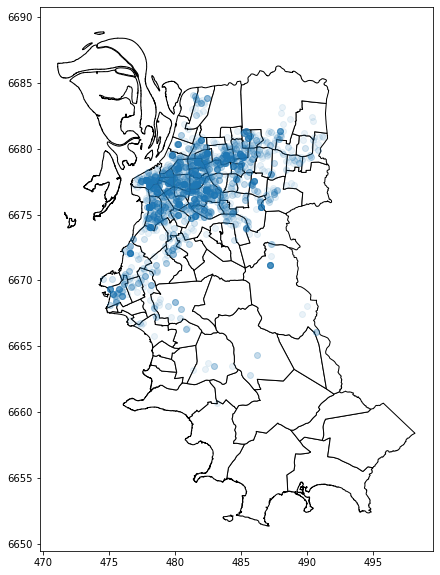

In [ ]:
base = poa_neighborhoods.plot(color='white', edgecolor='black', figsize=(20,10))
geo_dataframe.plot(ax = base, figsize=(20,10), alpha = 0.09)

## Obtaining other features for the Geodataframe

### Shopping malls:

In [ ]:
malls = ['barra_shopping_sul', 'bourbon_shopping_assis_brasil', 'bourbon_shopping_wallig', 'iguatemi', 'rua_da_praia_shopping',
         'shopping_total', 'boulevard_assis_brasil', 'bourbon_shopping_country', 'dc_shopping', 'lindoia_shopping', 
         'shopping_joao_pessoa', 'bourbon_shopping_ipiranga', 'praia_de_belas']
malls = pd.DataFrame(malls, columns = ['malls'])

latitude = [-30.084877, -30.008389, -30.011055, -30.027731, -30.031111, -30.025705, -30.008919, -30.021971, -29.996120, 
            -30.010042, -30.045721, -30.055740, -30.049204]
latitude = pd.DataFrame(latitude, columns = ['latitude'])

longitude = [-51.246326, -51.180988, -51.160980, -51.163200, -51.231220, -51.212402, -51.144642, -51.162601, -51.202381, 
             -51.152302, -51.213242, -51.187450, -51.229053]
longitude = pd.DataFrame(longitude, columns = ['longitude'])

shopping_malls = pd.concat([malls, latitude, longitude], axis = 1)

geometry = [Point(x) for x in zip(shopping_malls.longitude, shopping_malls.latitude)]

crs = {'proj': 'latlong', 'ellps': 'WGS84', 'datum': 'WGS84', 'no_defs': True}
geo_shopping_malls = gpd.GeoDataFrame(shopping_malls, crs = crs, geometry = geometry)
geo_shopping_malls

,malls,latitude,longitude,geometry
0,barra_shopping_sul,-30.084877,-51.246326,POINT (-51.24633 -30.08488)
1,bourbon_shopping_assis_brasil,-30.008389,-51.180988,POINT (-51.18099 -30.00839)
2,bourbon_shopping_wallig,-30.011055,-51.160980,POINT (-51.16098 -30.01105)
3,iguatemi,-30.027731,-51.163200,POINT (-51.16320 -30.02773)
4,rua_da_praia_shopping,-30.031111,-51.231220,POINT (-51.23122 -30.03111)
5,shopping_total,-30.025705,-51.212402,POINT (-51.21240 -30.02570)
6,boulevard_assis_brasil,-30.008919,-51.144642,POINT (-51.14464 -30.00892)
7,bourbon_shopping_country,-30.021971,-51.162601,POINT (-51.16260 -30.02197)
8,dc_shopping,-29.996120,-51.202381,POINT (-51.20238 -29.99612)
9,lindoia_shopping,-30.010042,-51.152302,POINT (-51.15230 -30.01004)


In [ ]:
geo_shopping_malls = geo_shopping_malls.to_crs('+proj=utm +zone=22 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

### Tourist and important places:

In [ ]:
tourist_points = ['jardim_botanico', 'moinhos_de_vento', 'parque_farroupilha', 'parque_germania', 'marinha_do_brasil', 
                  'praca_da_alfandega', 'usina_do_gasometro', 'veleiros_do_sul', 'praia_de_ipanema', 'beira-rio', 
                  'arena_gremio', 'aeroporto', 'ufrgs_centro', 'ufrgs_vale', 'puc', 'ipa', 'unisinos', 'uniritter']
tourist_points = pd.DataFrame(tourist_points, columns = ['tourist_points'])

latitude = [-30.05033, -30.02715, -30.03664, -30.02581, -30.05631, -30.02941, -30.03436, -30.09767, - 30.13506, -30.06535, 
            -29.97402, -29.99276, -30.03362, -30.07553, -30.05878, -30.03413, -30.02800, -30.07918]
latitude = pd.DataFrame(latitude, columns = ['latitude'])

longitude = [-51.17874, -51.20114, -51.21667, -51.15821, -51.23143, -51.23230, -51.24088, -51.25596, -51.23260, - 51.23659, 
             -51.19477, -51.17635, -51.22004, -51.12470, -51.17348, -51.19783, -51.17539, -51.21996]
longitude = pd.DataFrame(longitude, columns = ['longitude'])

top_points = pd.concat([tourist_points, latitude, longitude], axis = 1)

geometry = [Point(x) for x in zip(top_points.longitude, top_points.latitude)]

crs = {'proj': 'latlong', 'ellps': 'WGS84', 'datum': 'WGS84', 'no_defs': True}
geo_top_points = gpd.GeoDataFrame(top_points, crs = crs, geometry = geometry)
geo_top_points

,tourist_points,latitude,longitude,geometry
0,jardim_botanico,-30.05033,-51.17874,POINT (-51.17874 -30.05033)
1,moinhos_de_vento,-30.02715,-51.20114,POINT (-51.20114 -30.02715)
2,parque_farroupilha,-30.03664,-51.21667,POINT (-51.21667 -30.03664)
3,parque_germania,-30.02581,-51.15821,POINT (-51.15821 -30.02581)
4,marinha_do_brasil,-30.05631,-51.23143,POINT (-51.23143 -30.05631)
5,praca_da_alfandega,-30.02941,-51.23230,POINT (-51.23230 -30.02941)
6,usina_do_gasometro,-30.03436,-51.24088,POINT (-51.24088 -30.03436)
7,veleiros_do_sul,-30.09767,-51.25596,POINT (-51.25596 -30.09767)
8,praia_de_ipanema,-30.13506,-51.23260,POINT (-51.23260 -30.13506)
9,beira-rio,-30.06535,-51.23659,POINT (-51.23659 -30.06535)


In [ ]:
geo_top_points = geo_top_points.to_crs('+proj=utm +zone=22 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

### Train stations:

In [ ]:
stations = ['mercado', 'rodoviaria', 'sao_pedro', 'farrapos', 'aeroporto', 'anchieta']
stations = pd.DataFrame(stations, columns = ['station'])

latitude = [-30.02631, -30.02272, -30.00665, -29.99713, -29.98776, -29.97696]
latitude = pd.DataFrame(latitude, columns = ['latitude'])

longitude = [-51.22821, -51.22041, -51.20849, -51.19783, -51.18304, -51.17878]
longitude = pd.DataFrame(longitude, columns = ['longitude'])

trains = pd.concat([stations, latitude, longitude], axis = 1)

geometry = [Point(x) for x in zip(trains.longitude, trains.latitude)]

crs = {'proj': 'latlong', 'ellps': 'WGS84', 'datum': 'WGS84', 'no_defs': True}
geo_trains = gpd.GeoDataFrame(trains, crs = crs, geometry = geometry)
geo_trains

,station,latitude,longitude,geometry
0,mercado,-30.02631,-51.22821,POINT (-51.22821 -30.02631)
1,rodoviaria,-30.02272,-51.22041,POINT (-51.22041 -30.02272)
2,sao_pedro,-30.00665,-51.20849,POINT (-51.20849 -30.00665)
3,farrapos,-29.99713,-51.19783,POINT (-51.19783 -29.99713)
4,aeroporto,-29.98776,-51.18304,POINT (-51.18304 -29.98776)
5,anchieta,-29.97696,-51.17878,POINT (-51.17878 -29.97696)


In [ ]:
geo_trains = geo_trains.to_crs('+proj=utm +zone=22 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Now that we have our points of interest, let's plot them altogheter:</p> 

<AxesSubplot:>

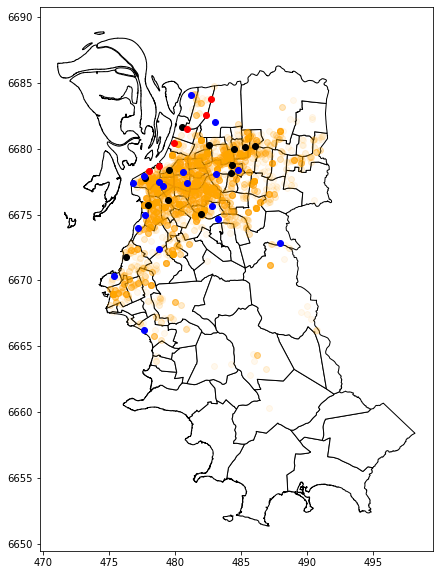

In [ ]:
base = poa_neighborhoods.plot(color='white', edgecolor='black', figsize=(20,10))
geo_dataframe.plot(ax = base, color='orange', alpha = 0.07)
geo_shopping_malls.plot(ax = base, color = 'black', alpha = 1)
geo_top_points.plot(ax = base, color = 'blue', alpha =1)
geo_trains.plot(ax = base, color = 'red', alpha =1)

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Finally, we can estimate the minimum distance between each data of the geodataframe and the points of interest, and then generate our final dataframe:</p> 


In [ ]:
geo_dataframe['Dist_malls'] = geo_dataframe['geometry'].apply(lambda x: geo_shopping_malls.distance(x).min())
geo_dataframe['Dist_top_points'] = geo_dataframe['geometry'].apply(lambda x: geo_top_points.distance(x).min())
geo_dataframe['Dist_trains'] = geo_dataframe['geometry'].apply(lambda x: geo_trains.distance(x).min())
geo_dataframe.head()

,level_0,index,value,address,area,rooms,bathrooms,garage,geo_addres,latitude,longitude,geometry,Dist_malls,Dist_top_points,Dist_trains
0,0,0,1120000,"rua são josemaria escriva, 669 - jardim do salso, porto alegre - rs",58,1,2,2,"Rua São Josemaría Escrivá, Jardim do Salso, Porto Alegre, Região Geográfica Imediata de Porto Alegre, Região Metropolitana de Porto Alegre, Região Geográfica Intermediária de Porto Alegre, Rio Grande do Sul, Região Sul, 91410-000, Brasil",-30.054142,-51.168068,POINT (483.799 6675.203),1.876655,0.732252,6.130965
1,1,1,773390,"rua miguel tostes, 962 - rio branco, porto alegre - rs",43,1,1,1,"Rua Miguel Tostes, Rio Branco, Porto Alegre, Região Geográfica Imediata de Porto Alegre, Região Metropolitana de Porto Alegre, Região Geográfica Intermediária de Porto Alegre, Rio Grande do Sul, Região Sul, 90420-090, Brasil",-30.033503,-51.205685,POINT (480.169 6677.484),1.079912,0.760482,1.855720
2,2,2,350000,"avenida professor oscar pereira, 1207 - azenha, porto alegre - rs",88,2,1,1,"Avenida Professor Oscar Pereira, Vila Cabo Rocha, Azenha, Porto Alegre, Região Geográfica Imediata de Porto Alegre, Região Metropolitana de Porto Alegre, Região Geográfica Intermediária de Porto Alegre, Rio Grande do Sul, Região Sul, 90160-002, Brasil",-30.052573,-51.212215,POINT (479.543 6675.370),0.765667,1.816994,3.293501
3,3,3,2190000,"rua pedro chaves barcelos, 981 - bela vista, porto alegre - rs",237,3,4,3,"Rua Pedro Chaves Barcelos, Bela Vista, Porto Alegre, Região Geográfica Imediata de Porto Alegre, Região Metropolitana de Porto Alegre, Região Geográfica Intermediária de Porto Alegre, Rio Grande do Sul, Região Sul, 90470-040, Brasil",-30.032444,-51.186532,POINT (482.015 6677.605),2.309452,1.105229,3.439713
4,4,4,380000,"rua monte arraes, 300 - nonoai, porto alegre - rs",68,3,2,1,"Rua Monte Arraes, Nonoai, Porto Alegre, Região Geográfica Imediata de Porto Alegre, Região Metropolitana de Porto Alegre, Região Geográfica Intermediária de Porto Alegre, Rio Grande do Sul, Região Sul, 90830-430, Brasil",-30.091818,-51.228516,POINT (477.980 6671.018),1.880705,1.625147,7.259030


In [ ]:
geo_dataframe.to_file('geo_dataframe_final.shp')

# Exploratory and Predictive Data Analysis

## Importing libraries

In [278]:
import pandas as pd
#import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn import svm
from scipy.stats import probplot
from sklearn.ensemble import GradientBoostingRegressor
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

## Reading the Geodataframe and converting it to a Dataframe

In [ ]:
geo_dataframe = gpd.read_file('geo_dataframe_final.shp')

dataframe = pd.DataFrame(geo_dataframe)
dataframe.drop(columns = ['level_0', 'index', 'geo_addres', 'latitude', 'longitude', 'geometry'], inplace = True)
dataframe.rename(columns = {'price': 'value', 'Dist_top_p': 'Dist_top_points', 'neighborho': 'neighborhood'}, inplace = True)
dataframe.head()

,value,address,neighborhood,area,rooms,bathrooms,garage,Dist_malls,Dist_top_points,Dist_train
0,519900,"rua são luís, 1163 - santana, porto alegre - rs",santana,58,2,2,1,0.652657,1.304475,2.757344
1,773390,"rua miguel tostes, 962 - rio branco, porto alegre - rs",rio branco,43,1,1,1,1.079912,0.760482,1.855720
2,270000,"rua marechal floriano peixoto, 390 - centro histórico, porto alegre - rs",centro histórico,68,2,3,0,0.416741,0.545251,0.522463
3,455000,"rua garibaldi, 1033 - bom fim, porto alegre - rs",bom fim,59,2,1,1,0.679108,0.530496,1.077245
4,624000,"rua general neto - moinhos de vento, porto alegre - rs",moinhos de vento,113,3,3,2,0.260244,0.887137,1.036251


In [3]:
type(dataframe)

pandas.core.frame.DataFrame

In [4]:
dataframe.shape

(6879, 10)

## EDA

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Firstly we are going to create a new column related to the price of apartments per area:</p> 

In [5]:
dataframe['value/m²'] = dataframe['value'] / dataframe['area']
dataframe.head()   

,value,address,neighborhood,area,rooms,bathrooms,garage,Dist_malls,Dist_top_points,Dist_train,value/m²
0,519900,"rua são luís, 1163 - santana, porto alegre - rs",santana,58,2,2,1,0.652657,1.304475,2.757344,8963.793103
1,773390,"rua miguel tostes, 962 - rio branco, porto alegre - rs",rio branco,43,1,1,1,1.079912,0.760482,1.855720,17985.813953
2,270000,"rua marechal floriano peixoto, 390 - centro histórico, porto alegre - rs",centro histórico,68,2,3,0,0.416741,0.545251,0.522463,3970.588235
3,455000,"rua garibaldi, 1033 - bom fim, porto alegre - rs",bom fim,59,2,1,1,0.679108,0.530496,1.077245,7711.864407
4,624000,"rua general neto - moinhos de vento, porto alegre - rs",moinhos de vento,113,3,3,2,0.260244,0.887137,1.036251,5522.123894


In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6879 entries, 0 to 6878
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   value            6879 non-null   int64  
 1   address          6879 non-null   object 
 2   neighborhood     6879 non-null   object 
 3   area             6879 non-null   int64  
 4   rooms            6879 non-null   int64  
 5   bathrooms        6879 non-null   int64  
 6   garage           6879 non-null   int64  
 7   Dist_malls       6879 non-null   float64
 8   Dist_top_points  6879 non-null   float64
 9   Dist_train       6879 non-null   float64
 10  value/m²         6879 non-null   float64
dtypes: float64(4), int64(5), object(2)
memory usage: 591.3+ KB


### Main statistics of the dataframe


In [7]:
dataframe.describe().round(2)

,value,area,rooms,bathrooms,garage,Dist_malls,Dist_top_points,Dist_train,value/m²
count,6879.00,6879.00,6879.00,6879.00,6879.00,6879.00,6879.00,6879.00,6879.00
mean,676078.65,90.74,2.30,1.88,1.20,1.45,1.27,3.85,6796.68
std,822343.67,58.28,0.75,1.00,0.92,1.17,0.92,2.38,3388.85
min,30000.00,16.00,1.00,1.00,0.00,0.03,0.05,0.10,419.30
25%,299000.00,59.00,2.00,1.00,1.00,0.68,0.70,2.27,4425.06
50%,450000.00,76.00,2.00,2.00,1.00,1.21,1.12,3.38,5965.91
75%,746550.00,103.00,3.00,2.00,2.00,1.86,1.52,4.71,8333.33
max,19934700.00,853.00,7.00,8.00,9.00,12.77,9.66,17.44,62500.00


In [8]:
len(dataframe['neighborhood'].unique())

86

In [9]:
dataframe['neighborhood'].value_counts()

petrópolis              700
menino deus             528
centro histórico        363
bela vista              341
passo da areia          298
rio branco              274
auxiliadora             265
santana                 216
moinhos de vento        205
higienópolis            198
cidade baixa            191
tristeza                191
jardim botânico         190
bom fim                 166
partenon                138
jardim itú sabará       124
vila ipiranga           120
cristo redentor         115
cristal                 114
mont' serrat            114
floresta                103
boa vista               102
independência            95
teresópolis              92
jardim europa            90
são joão                 84
jardim carvalho          82
jardim lindóia           77
sarandi                  71
santo antônio            65
cavalhada                64
azenha                   62
jardim do salso          52
farroupilha              51
chácara das pedras       50
jardim leopoldina   

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>It's possible to see that there are many neighboorhoods with just a few number of data, which can later affect our prediction model. Ideally, it should be better to get more data in order to have a better distribution of features among them. Let's check the features correlation:</p> 

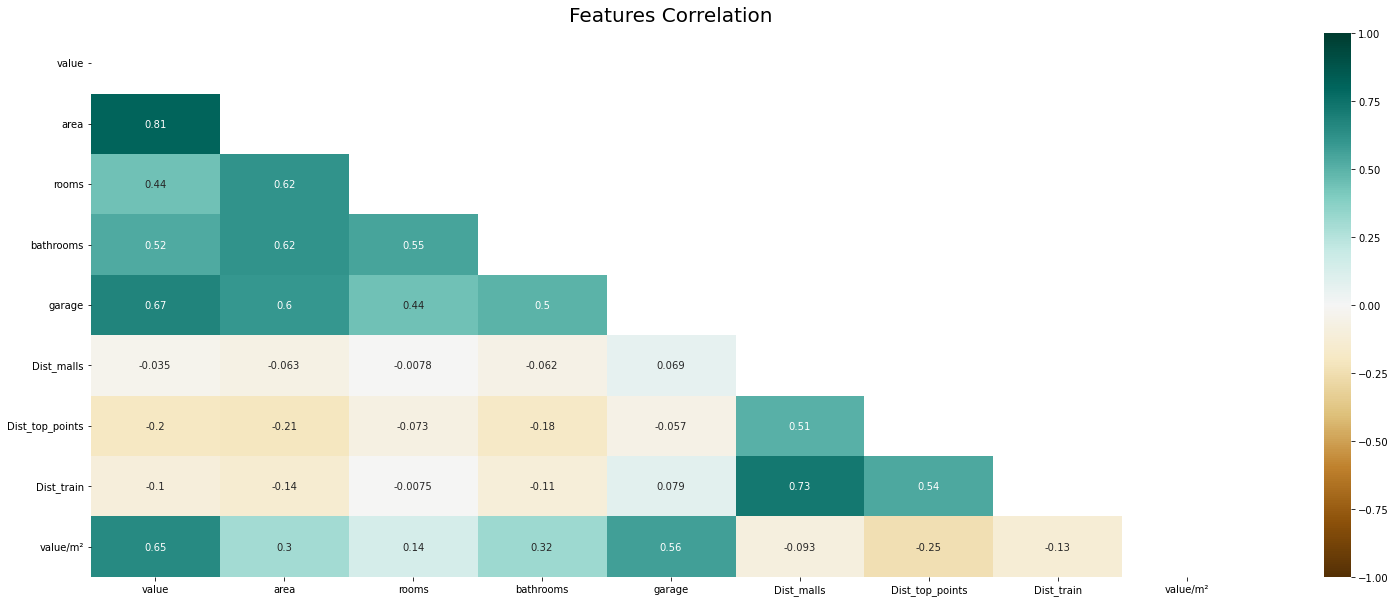

In [10]:
plt.figure(figsize=(26, 10))
mask = np.triu(np.ones_like(dataframe.corr(), dtype=bool))
ax = sns.heatmap(dataframe.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG', mask = mask)
ax.set_title('Features Correlation', fontdict={'fontsize':20}, pad=12, color = 'black')
plt.show()

### Top 10 apartments and neighborhoods by price

In [11]:
top_10 = dataframe.sort_values(by = ['value'], ascending = False).iloc[:10]
top_10

,value,address,neighborhood,area,rooms,bathrooms,garage,Dist_malls,Dist_top_points,Dist_train,value/m²
3911,19934700,"rua engenheiro ildefonso simões lopes, 190 - três figueiras, porto alegre - rs",três figueiras,853,4,3,8,1.438497,0.733283,4.415666,23370.105510
1915,11499000,"rua comendador rheingantz, 900 - bela vista, porto alegre - rs",bela vista,510,4,4,5,2.219112,1.055738,3.393533,22547.058824
4080,10511000,"rua engenheiro ildefonso simões lopes, 190 - três figueiras, porto alegre - rs",três figueiras,455,4,2,5,1.438497,0.733283,4.415666,23101.098901
982,9500000,"três figueiras, porto alegre - rs",três figueiras,442,3,4,4,1.075502,0.514861,4.433838,21493.212670
993,9354000,"bela vista, porto alegre - rs",bela vista,510,4,6,5,2.280243,0.732969,3.216909,18341.176471
781,9277000,"avenida diário de notícias - cristal, porto alegre - rs",cristal,554,6,7,5,1.136742,0.661809,7.855660,16745.487365
6112,9151000,"bela vista, porto alegre - rs",bela vista,509,4,3,5,2.280243,0.732969,3.216909,17978.388998
5628,9151000,"rua comendador rheingantz, 900 - bela vista, porto alegre - rs",bela vista,510,4,3,5,2.219112,1.055738,3.393533,17943.137255
6808,8600000,"cristal, porto alegre - rs",cristal,543,4,8,5,0.458484,1.936522,6.324044,15837.937385
5422,8500000,"auxiliadora, porto alegre - rs",auxiliadora,382,4,1,5,1.586000,1.288852,2.274254,22251.308901


<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>The prices are much higher than the median of the dataset (675,991.96), which was previously expected given the high standard deviation (822,146.28). However, this can be also a problem to the prediction model. Let's aggregate the feature 'neighborhood' to check which neighboorhoods have the higher apartment prices.</p> 

In [12]:
group_neighborhood = dataframe[['value', 'neighborhood']].groupby(by = 'neighborhood').agg(func=['min', 'median', 'max', 'count'])
group_neighborhood.head()

value                         
                     min    median      max count
neighborhood                                     
agronomia         114900  220000.0   318000    10
alto petrópolis   189900  239445.0   900000    32
alto teresópolis  144900  144900.0   144900     1
auxiliadora       150000  650000.0  8500000   265
azenha             98000  348000.0   776800    62

In [13]:
top_10_neighborhood = group_neighborhood['value']['median'].sort_values(ascending = False)
top_10_neighborhood.head(10)

neighborhood
vila assunção       1800000.0
jardim europa       1335000.0
três figueiras      1290000.0
bela vista           965000.0
moinhos de vento     950000.0
pedra redonda        808500.0
central parque       792252.5
mont' serrat         750000.0
jardim planalto      689000.0
petrópolis           680000.0
Name: median, dtype: float64

In [14]:
group_neighborhood_m2 = dataframe[['value/m²', 'neighborhood']].groupby(by = 'neighborhood').agg(func=['min', 'mean', 'median', 'max', 'count'])
group_neighborhood_m2.head()

value/m²                                              
                          min         mean       median           max count
neighborhood                                                               
agronomia         2611.363636  4225.674423  4009.603842   6707.317073    10
alto petrópolis   2784.810127  4691.365057  4592.524510   6612.903226    32
alto teresópolis  3715.384615  3715.384615  3715.384615   3715.384615     1
auxiliadora       2750.000000  8082.362841  6730.158730  22251.308901   265
azenha            2279.069767  5895.277429  6006.835270  10377.586207    62

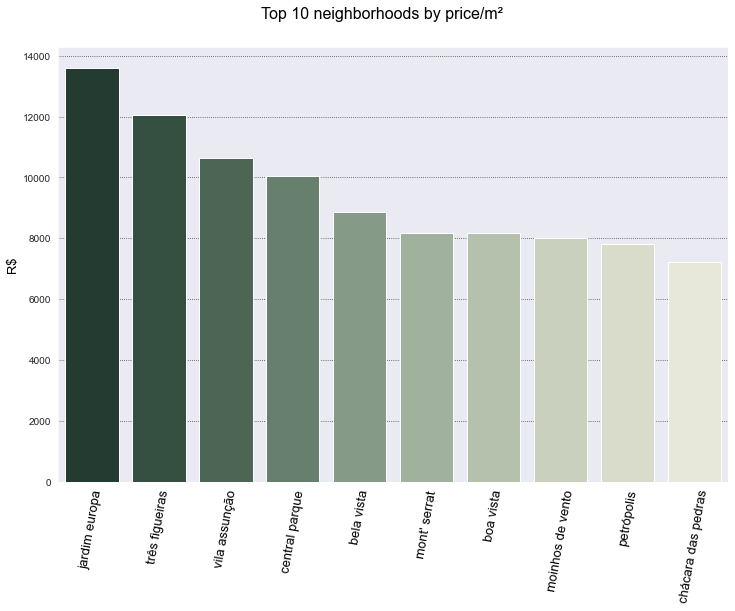

In [15]:
top_10_neighborhood_m2 = group_neighborhood_m2['value/m²']['median'].sort_values(ascending = False).iloc[:10]

sns.set_style('darkgrid', {"grid.color": ".2", "grid.linestyle": ":"})

ax = sns.barplot(x = top_10_neighborhood_m2.index, y = top_10_neighborhood_m2.values, palette = 'YlGn_r', saturation = 0.25)
ax.figure.set_size_inches(12, 8)
ax.figure.suptitle('Top 10 neighborhoods by price/m²', color = 'black', fontsize = 16, y = 0.95)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80, color = 'black', fontsize = 13)
ax.set_ylabel('R$', color = 'black', fontsize = 13)
ax.set_xlabel('', color = 'black', fontsize = 13)

plt.show()

### Graph Analysis

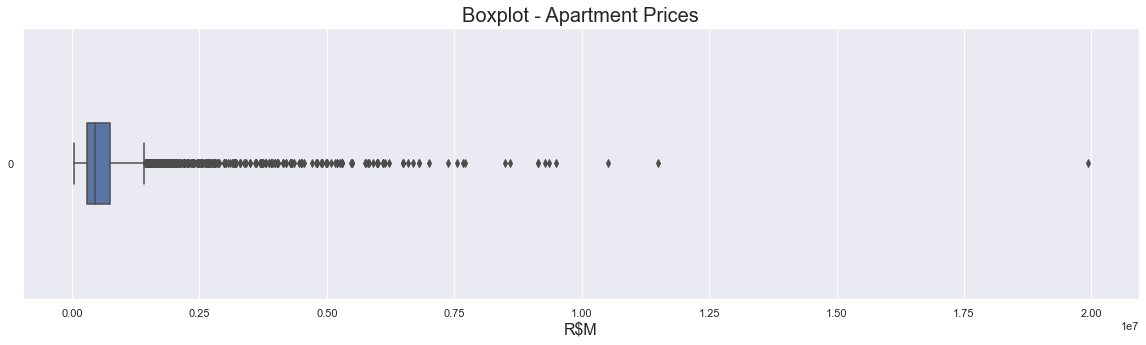

In [16]:
sns.set(style = 'darkgrid')

ax = sns.boxplot(data=dataframe['value'], orient='h', width = 0.3)
ax.figure.set_size_inches(20, 5)
ax.set_title('Boxplot - Apartment Prices', fontsize=20)
ax.set_xlabel('R$M', fontsize=16)
ax
plt.show()

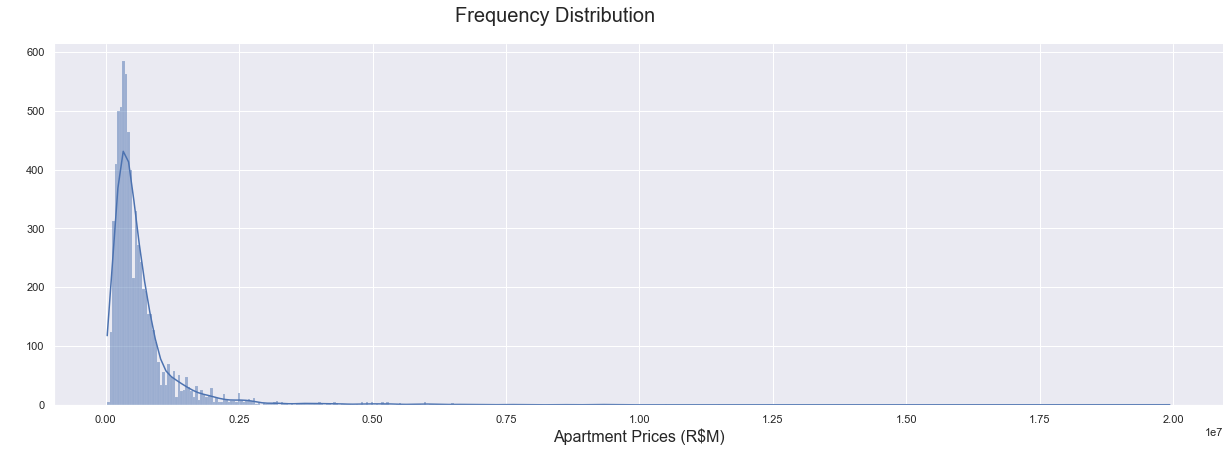

In [17]:
sns.set(style = 'darkgrid')

ax = sns.displot(dataframe['value'], kde = True)
ax.figure.set_size_inches(20, 6)
ax.set_axis_labels("Apartment Prices (R$M)", " " , fontsize = 16)
ax.fig.suptitle("Frequency Distribution", fontsize = 20, y = 1.05)
ax
plt.show()

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>The visualization of both graphs is distorted by the presence of higher apartment prices. The following graphs show the correlation between the feature 'value' and the others, highlighting 'area' afterwards.</p> 

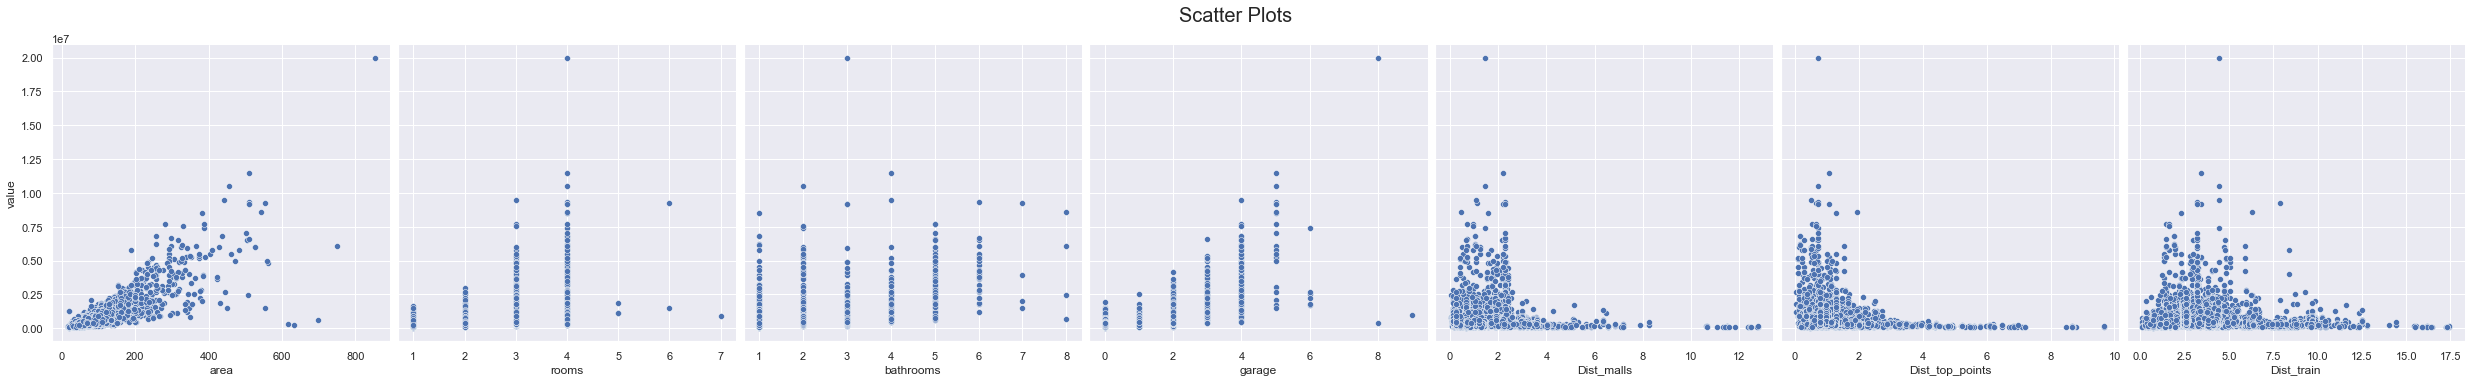

In [18]:
sns.set(style = 'darkgrid')

ax = sns.pairplot(dataframe, y_vars='value', x_vars=['area', 'rooms', 'bathrooms', 'garage', 'Dist_malls', 
                                                     'Dist_top_points', 'Dist_train'], height=5)
ax.fig.suptitle('Scatter Plots', fontsize=20, y=1.05)
ax
plt.show()

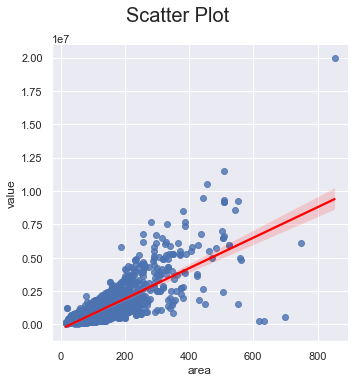

In [19]:
sns.set(style = 'darkgrid')

ax = sns.pairplot(dataframe, y_vars='value', x_vars='area', kind='reg', height=5, plot_kws = {'line_kws':{'color': 'red'}})
ax.fig.suptitle('Scatter Plot', fontsize=20, y=1.05)
ax
plt.show()

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>In order to normalize our feature 'value' and re-scale the others, it's possible to use log normalization (we add '+1' to some features because they contain minimum value either 0 or close to it):</p> 

In [20]:
dataframe['log_value'] = np.log(dataframe['value'])
dataframe['log_area'] = np.log(dataframe['area'])
dataframe['log_rooms'] = np.log(dataframe['rooms'])
dataframe['log_bathrooms'] = np.log(dataframe['bathrooms'])
dataframe['log_garage'] = np.log(dataframe['garage'] + 1)
dataframe['log_Dist_malls'] = np.log(dataframe['Dist_malls'] + 1)
dataframe['log_Dist_top_points'] = np.log(dataframe['Dist_top_points'] + 1)
dataframe['log_Dist_train'] = np.log(dataframe['Dist_train'] + 1)

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>We can now plot the graphs again and check the differences.</p> 

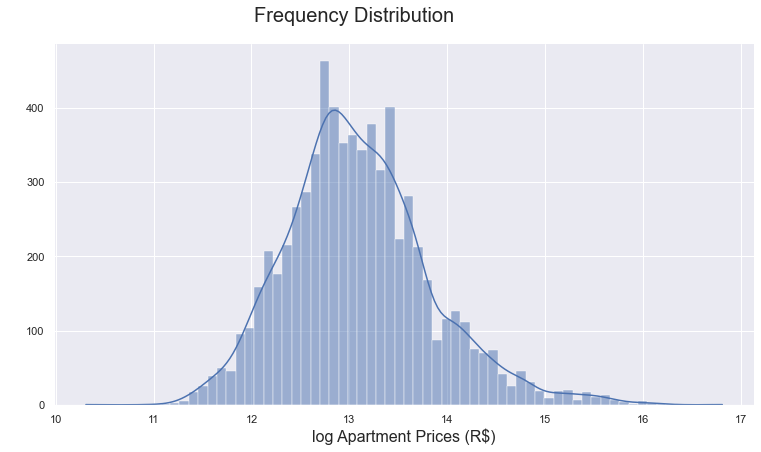

In [21]:
sns.set(style = 'darkgrid')

ax = sns.displot(dataframe['log_value'], kde = True)
ax.figure.set_size_inches(12, 6)
ax.set_axis_labels("log Apartment Prices (R$)", " " , fontsize = 16)
ax.fig.suptitle("Frequency Distribution", fontsize = 20, y = 1.05)
ax
plt.show()

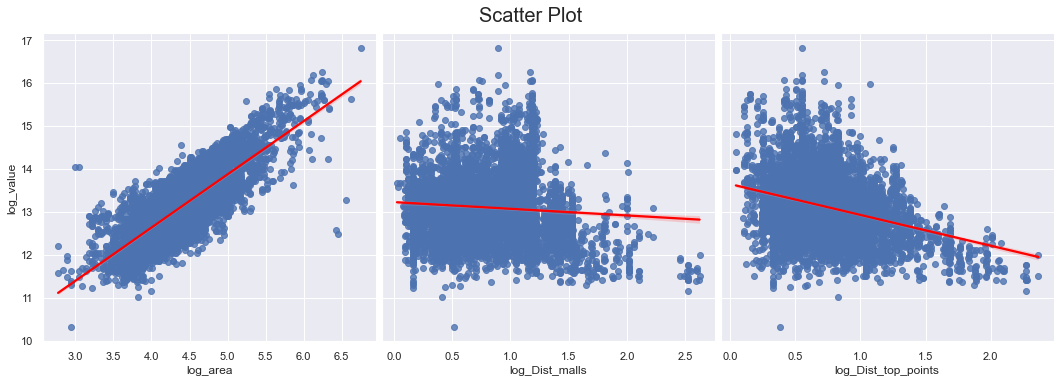

In [22]:
sns.set(style = 'darkgrid')

ax = sns.pairplot(dataframe, y_vars='log_value', x_vars = ['log_area', 'log_Dist_malls', 'log_Dist_top_points'],
                  kind='reg', height=5, plot_kws = {'line_kws':{'color': 'red'}})
ax.fig.suptitle('Scatter Plot', fontsize=20, y=1.05)
ax
plt.show()

## Prediction Model

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>For this work, having the prices of apartments as the targed feature, we will use ML regression models and find the one that best fits our dataset.</p> 

### Statsmodels Linear Regression

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Let's begin with linear regression from Statsmodels library.</p> 

In [23]:
y = dataframe['log_value']

In [24]:
X = dataframe[['log_area', 'log_rooms', 'log_bathrooms', 'log_garage', 'log_Dist_malls', 'log_Dist_top_points', 
               'log_Dist_train']]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2516)

In [26]:
X_train_constant = sm.add_constant(X_train)

In [27]:
X_train_constant.head()

,const,log_area,log_rooms,log_bathrooms,log_garage,log_Dist_malls,log_Dist_top_points,log_Dist_train
5731,1.0,3.806662,0.000000,0.000000,0.000000,0.896674,1.246900,1.614996
652,1.0,4.718499,0.693147,1.098612,1.098612,0.617807,0.468400,0.895988
6864,1.0,4.382027,0.693147,0.693147,0.000000,0.237451,0.574093,1.273546
3605,1.0,4.290459,1.098612,0.693147,1.098612,0.327419,1.098650,1.428820
4252,1.0,4.043051,0.693147,0.000000,0.693147,1.354024,1.352728,2.267303


In [28]:
model_statsmodels = sm.OLS(y_train, X_train_constant, hasconst = True).fit()

In [29]:
model_statsmodels.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_value   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     3140.
Date:                Mon, 23 May 2022   Prob (F-statistic):               0.00
Time:                        20:08:37   Log-Likelihood:                -1745.6
No. Observations:                5503   AIC:                             3507.
Df Residuals:                    5495   BIC:                             3560.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   9.3440      0.067    139.128      0.000       9.212       9.476
log_area                0.8345      0.017     50.012      0.000       0.802       0.867
log_rooms              -0.1030      0.018     -5.709      0.000      -0.138      -0.068
log_bathrooms           0.1274      0.012     10.253      0.000       0.103       0.152
log_garage              0.7159      0.013     54.892      0.000       0.690       0.742
log_Dist_malls         -0.0725      0.014     -5.026      0.000      -0.101      -0.044
log_Dist_top_points    -0.3521      0.017    -21.199      0.000      -0.385      -0.320
log_Dist_train         -0.0436      0.013     -3.319      0.001      -0.069      -0.018
==============================================================================
Omnibus:                      261.617   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              917.946
Skew:                           0.070   Prob(JB):                    4.68e-200
Kurtosis:                       4.996   Cond. No.                         78.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
print('R² train = {}'.format(model_statsmodels.rsquared_adj.round(3)))

R² train = 0.8


In [31]:
X_test_constant = sm.add_constant(X_test)

In [32]:
predictions = model_statsmodels.predict(X_test_constant)

In [33]:
statsmodels = metrics.r2_score(y_test, predictions).round(3)

In [34]:
print('R² test = %s' % statsmodels)

R² test = 0.779


<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Both F-Statistic and p-value indicate that our variables are statistically significant as a group and individually, respectively. However, the Omnibus and Jarque-Bera statistical tests conclude that the residuals are not normally distributed (necessary condition to make valid inferences from the regression). We are going to check the linear regression with Sklearn and then the graph analysis for residuals.</p> 

###  Sklearn Linear Regression

In [35]:
model_linear_regression =  LinearRegression() 

In [36]:
y = dataframe['log_value']

In [37]:
X = dataframe[['log_area', 'log_rooms', 'log_bathrooms', 'log_garage', 'log_Dist_malls', 'log_Dist_top_points',
               'log_Dist_train']]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2516)

In [39]:
X_train_constant = sm.add_constant(X_train)

In [40]:
model_linear_regression = model_linear_regression.fit(X_train, y_train)

In [41]:
print('R² train = {}'.format(model_linear_regression.score(X_train, y_train).round(3)))

R² train = 0.8


In [42]:
y_predicted = model_linear_regression.predict(X_test)

In [43]:
sklearn_linear_regression = metrics.r2_score(y_test, y_predicted).round(3)

In [44]:
print('R² test = %s' % sklearn_linear_regression)

R² test = 0.779


<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>As expected, both models produced the same R². Residuals graph analysis:</p> 

In [45]:
model_linear_regression.intercept_

9.3439530104049

In [46]:
model_linear_regression.coef_

array([ 0.83449116, -0.1030046 ,  0.12737736,  0.71594624, -0.07247425,
       -0.35207878, -0.04356651])

In [47]:
X.columns

Index(['log_area', 'log_rooms', 'log_bathrooms', 'log_garage',
       'log_Dist_malls', 'log_Dist_top_points', 'log_Dist_train'],
      dtype='object')

In [48]:
index = ['Intercept','log_area', 'log_rooms', 'log_bathrooms', 'log_garage', 'log dist_malls', 'log dist_top_points', 
         'log_dist_train']

In [49]:
pd.DataFrame(data=np.append(model_linear_regression.intercept_, model_linear_regression.coef_), 
             index=index, columns=['Parameters'])

,Parameters
Intercept,9.343953
log_area,0.834491
log_rooms,-0.103005
log_bathrooms,0.127377
log_garage,0.715946
log dist_malls,-0.072474
log dist_top_points,-0.352079
log_dist_train,-0.043567


In [50]:
y_predicted_train = model_linear_regression.predict(X_train)

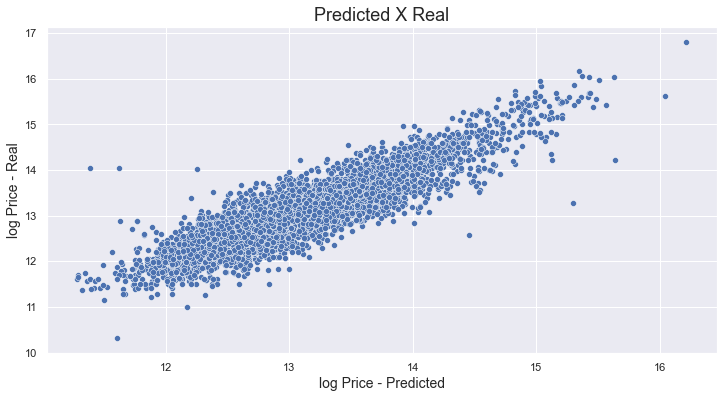

In [51]:
sns.set(style = 'darkgrid')

ax = sns.scatterplot(x = y_predicted_train, y = y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Predicted X Real', fontsize=18)
ax.set_xlabel('log Price - Predicted', fontsize=14)
ax.set_ylabel('log Price - Real', fontsize=14)
ax
plt.show()

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>We can observe a good correlation between predicted and real values, except for very low or very high prices, as we previously believed.</p> 

In [52]:
residual = y_train - y_predicted_train

In [53]:
residual.mean()

-9.386962909278445e-16

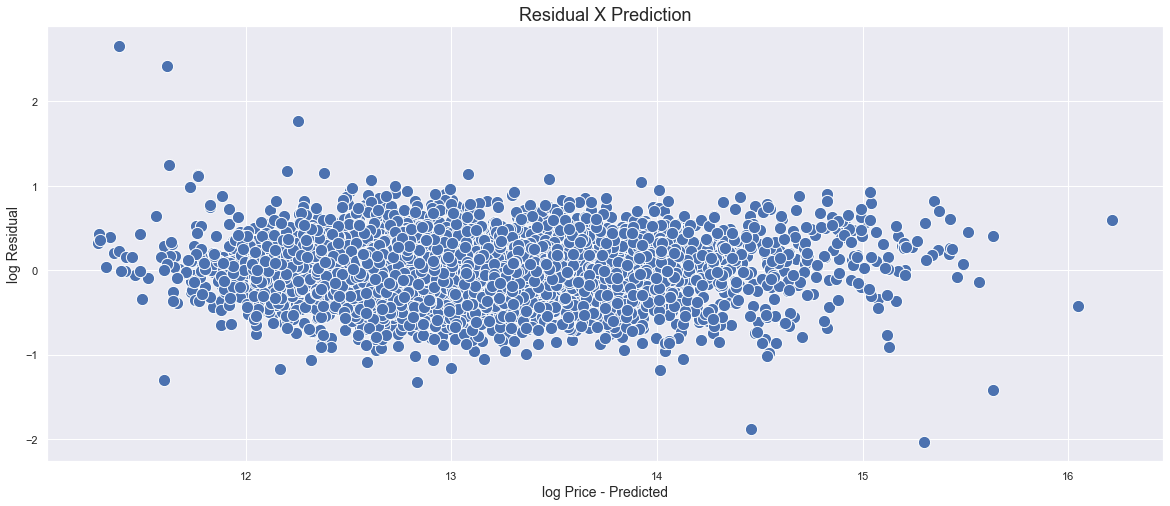

In [54]:
sns.set(style = 'darkgrid')

ax = sns.scatterplot(x = y_predicted_train, y = residual, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Residual X Prediction', fontsize=18)
ax.set_xlabel('log Price - Predicted', fontsize=14)
ax.set_ylabel('log Residual', fontsize=14)
ax
plt.show()

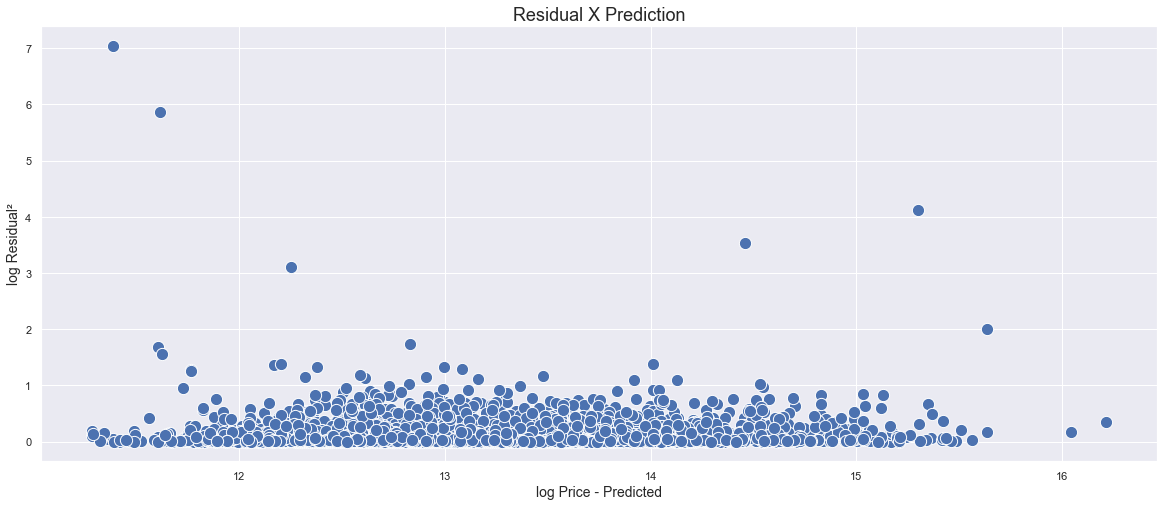

In [55]:
sns.set(style = 'darkgrid')

ax = sns.scatterplot(x = y_predicted_train, y = residual**2, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Residual X Prediction', fontsize=18)
ax.set_xlabel('log Price - Predicted', fontsize=14)
ax.set_ylabel('log Residual²', fontsize=14)
ax
plt.show()

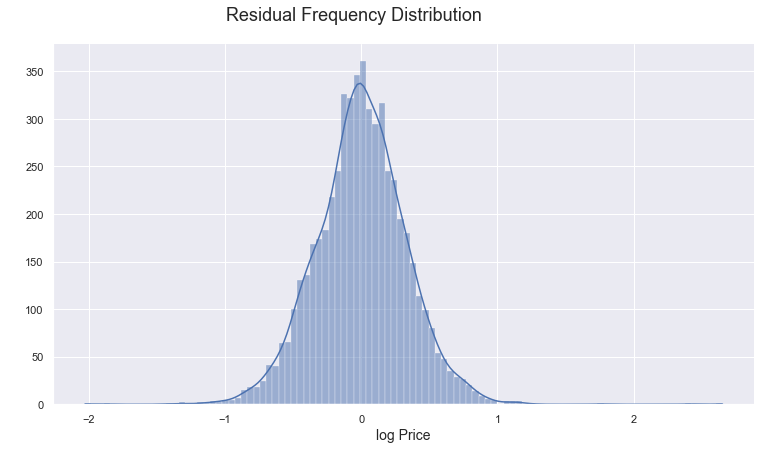

In [56]:
sns.set(style = 'darkgrid')

ax = sns.displot(residual, kde = True)
ax.figure.set_size_inches(12, 6)
ax.set_axis_labels("log Price", " " , fontsize = 14)
ax.fig.suptitle("Residual Frequency Distribution", fontsize = 18, y = 1.05)
ax
plt.show()

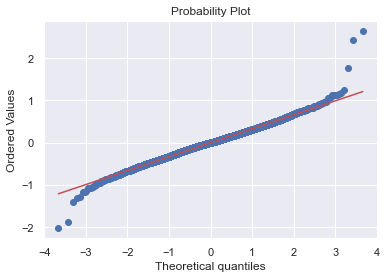

In [57]:
(_, (_, _, _)) = probplot(residual, plot = plt)

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>It's possible to verify the probable existence of outliers/extreme values which might be interfering the prediction model. For the next three models we'll add up the feature 'neighborhood'.</p> 

### Sklearn DecisionTreeRegressor

In [144]:
X = dataframe[['neighborhood', 'log_area', 'log_rooms', 'log_bathrooms', 'log_garage', 'log_Dist_malls', 'log_Dist_top_points',
               'log_Dist_train']]
X = pd.get_dummies(X, columns = ['neighborhood'])
y = dataframe['log_value']

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2516)

In [146]:
model_decision_tree_regressor = tree.DecisionTreeRegressor(random_state = 2516, max_depth = 6, max_features = 'auto')

In [147]:
model_decision_tree_regressor = model_decision_tree_regressor.fit(X_train, y_train)

In [148]:
print('R² train = {}'.format(model_decision_tree_regressor.score(X_train, y_train).round(3)))

R² train = 0.831


In [149]:
y_predicted = model_decision_tree_regressor.predict(X_test)

In [150]:
sklearn_decision_tree = metrics.r2_score(y_test, y_predicted).round(3)

In [151]:
print('R² test = %s' % sklearn_decision_tree)

R² test = 0.806


### Sklearn RandomForestRegressor

In [119]:
X = dataframe[['neighborhood', 'log_area', 'log_rooms', 'log_bathrooms', 'log_garage', 'log_Dist_malls', 'log_Dist_top_points',
               'log_Dist_train']]
X = pd.get_dummies(X, columns = ['neighborhood'])
y = dataframe['log_value']

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2516)

In [121]:
model_random_forest_regressor = RandomForestRegressor(random_state = 2516, max_depth = 15, max_features = 'auto')

In [122]:
model_random_forest_regressor = model_random_forest_regressor.fit(X_train, y_train)

In [123]:
print('R² train = {}'.format(model_random_forest_regressor.score(X_train, y_train).round(3)))

R² train = 0.961


In [124]:
y_predicted = model_random_forest_regressor.predict(X_test)

In [125]:
sklearn_random_forest = metrics.r2_score(y_test, y_predicted).round(3)

In [126]:
print('R² test = %s' % sklearn_random_forest)

R² test = 0.856


### Sklearn GradientBoostingRegressor

In [279]:
X = dataframe[['neighborhood', 'log_area', 'log_rooms', 'log_bathrooms', 'log_garage', 'log_Dist_malls', 'log_Dist_top_points',
               'log_Dist_train']]
X = pd.get_dummies(X, columns = ['neighborhood'])
y = dataframe['log_value']

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2516)

In [281]:
model_gradient_regressor = ensemble.GradientBoostingRegressor(n_estimators = 500, max_depth = 5, min_samples_split = 2,
                                                              learning_rate = 0.1, loss ='squared_error', random_state = 2516)

In [282]:
model_gradient_regressor = model_gradient_regressor.fit(X_train, y_train)

In [283]:
print('R² train = {}'.format(model_gradient_regressor.score(X_train, y_train).round(3)))

R² train = 0.949


In [284]:
y_predicted = model_gradient_regressor.predict(X_test)

In [285]:
sklearn_gradient_regressor = metrics.r2_score(y_test, y_predicted).round(3)

In [286]:
print('R² test = %s' % sklearn_gradient_regressor)

R² test = 0.865


### Sklearn BayesianRidgeRegression

In [74]:
X = dataframe[['log_area', 'log_rooms', 'log_bathrooms', 'log_garage', 'log_Dist_malls', 'log_Dist_top_points',
               'log_Dist_train']]
y = dataframe['log_value']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2516)

In [76]:
model_bayesian_ridge_regression = linear_model.BayesianRidge()

In [77]:
model_bayesian_ridge_regression = model_bayesian_ridge_regression.fit(X_train, y_train)

In [78]:
print('R² train = {}'.format(model_bayesian_ridge_regression.score(X_train, y_train).round(3)))

R² train = 0.797


In [79]:
y_predicted = model_bayesian_ridge_regression.predict(X_test)

In [80]:
sklearn_bayesian_ridge = metrics.r2_score(y_test, y_predicted).round(3)

In [81]:
print('R² test = %s' % sklearn_bayesian_ridge)

R² test = 0.793


### Sklearn SupportVectorRegression

In [153]:
X = dataframe[['log_area', 'log_rooms', 'log_bathrooms', 'log_garage', 'log_Dist_malls', 'log_Dist_top_points',
               'log_Dist_train']]
y = dataframe['log_value']

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2516)

In [155]:
model_SVR = svm.SVR(kernel = 'rbf')

In [156]:
model_SVR = model_SVR.fit(X_train, y_train)

In [157]:
print('R² train = {}'.format(model_SVR.score(X_train, y_train).round(3)))

R² train = 0.828


In [158]:
y_predicted = model_SVR.predict(X_test)

In [159]:
sklearn_svm_svr = metrics.r2_score(y_test, y_predicted).round(3)

In [160]:
print('R² test = %s' % sklearn_svm_svr)

R² test = 0.818


<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>We can now summarize the results for all models tested:</p> 

In [287]:
final_result = pd.DataFrame([statsmodels, sklearn_linear_regression, sklearn_decision_tree, sklearn_random_forest, 
                             sklearn_gradient_regressor, sklearn_bayesian_ridge, sklearn_svm_svr],
                            ['Statsmodels', 'Sklear Linear Regression', 'Sklearn Decision Tree', 'Sklearn Random Forest', 
                             'Sklearn Gradient Boosting Regressor', 'Sklearn Bayesian Ridge', 'Sklearn SVM SVR'],
                             columns = ['R² results'])
final_result

,R² results
Statsmodels,0.779
Sklear Linear Regression,0.779
Sklearn Decision Tree,0.806
Sklearn Random Forest,0.856
Sklearn Gradient Boosting Regressor,0.865
Sklearn Bayesian Ridge,0.793
Sklearn SVM SVR,0.818


<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>For this project, the algorithm model that best fits our dataset is Sklearn Gradient Boosting Regressor, which predicts our targed value 'Price of Apartments in Porto Alegre' with 86,5% of accuracy.</p> 
